In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [4]:
np.random.seed(42)
price_changes = np.random.choice([1, -1], size=500, p=[0.5, 0.5])
prices = 100+np.cumsum(price_changes)

In [5]:
X = price_changes.reshape(-1, 1)

In [6]:
model = hmm.GaussianHMM(n_components=2, covariance_type='diag', n_iter=100, random_state=42)
model.fit(X)

GaussianHMM(n_components=2, n_iter=100, random_state=42)

In [7]:
hidden_states = model.predict(X)

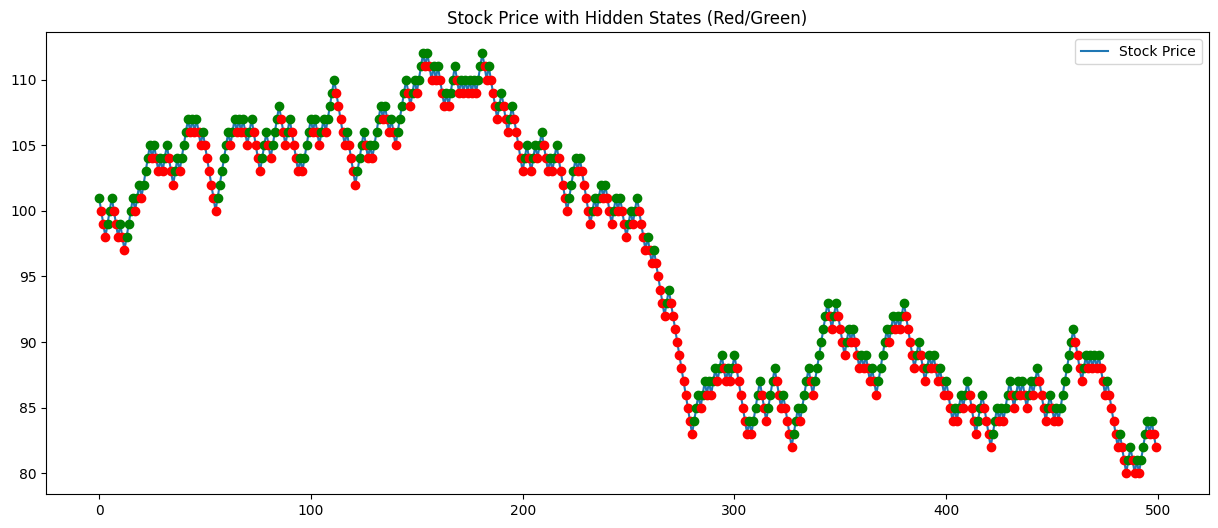

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(prices, label='Stock Price')
for i in range(len(hidden_states)):
    if hidden_states[i] == 0:
        plt.plot(i, prices[i], 'ro')
    else:
        plt.plot(i, prices[i], 'go')
plt.title('Stock Price with Hidden States (Red/Green)')
plt.legend()
plt.show()

In [9]:
print("Transition Matrix: \n", model.transmat_)

Transition Matrix: 
 [[0.54263566 0.45736434]
 [0.49377593 0.50622407]]


In [10]:
print("Means and Variances of each hidden state: \n")
print(model.means_)
print(model.covars_)

Means and Variances of each hidden state: 

[[-1.]
 [ 1.]]
[[[3.86100386e-05]]

 [[4.14937759e-05]]]
